In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df_june = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_june2016.csv")
df_july = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_july2016.csv")
df_aug = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_aug2016.csv")
df_sep = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_sep2016.csv")
df_oct = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_oct2016.csv")
df_nov = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_nov2016.csv")



In [46]:
df = pd.concat([df_june,df_july,df_aug,df_sep,df_oct,df_nov], axis=0)
df.reset_index(inplace=True)
# df.to_csv("check.csv")

In [47]:
df

,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,...,DewPoint,RelativeHumidity,WindDirection,WindDirectionCompass,WindSpeed,WindGust,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes
0,0,24,1467086400,1,94008,1,6/28/2016 14:00,6/28/2016 14:00,Australia/Hobart,12.000000,...,5.0,62,340,NNW,20,30.0,0.0,1015.0,0.0,0.0
1,1,23,1467090000,1,94008,1,6/28/2016 15:00,6/28/2016 15:00,Australia/Hobart,12.100000,...,5.2,63,340,NNW,18,28.0,0.0,1015.0,0.0,0.0
2,2,22,1467093600,1,94008,1,6/28/2016 16:00,6/28/2016 16:00,Australia/Hobart,11.500000,...,5.4,66,350,N,13,20.0,0.0,1015.0,0.0,0.0
3,3,21,1467097200,1,94008,1,6/28/2016 17:00,6/28/2016 17:00,Australia/Hobart,11.700000,...,5.4,65,350,N,13,20.0,0.0,1016.0,0.0,0.0
4,4,20,1467100800,1,94008,1,6/28/2016 18:00,6/28/2016 18:00,Australia/Hobart,10.900000,...,7.8,81,180,S,24,35.0,0.0,1017.0,0.0,0.0
5,5,19,1467104400,1,94008,1,6/28/2016 19:00,6/28/2016 19:00,Australia/Hobart,9.800000,...,8.6,92,330,NNW,9,11.0,0.2,1017.0,0.2,0.2
6,6,18,1467108000,1,94008,1,6/28/2016 20:00,6/28/2016 20:00,Australia/Hobart,9.700000,...,8.3,91,20,NNE,9,15.0,0.6,1017.0,0.4,0.4
7,7,17,1467111600,1,94008,1,6/28/2016 21:00,6/28/2016 21:00,Australia/Hobart,9.300000,...,7.6,89,330,NNW,9,15.0,0.8,1018.0,0.2,0.2
8,8,16,1467115200,1,94008,1,6/28/2016 22:00,6/28/2016 22:00,Australia/Hobart,10.400000,...,6.8,78,330,NNW,11,15.0,0.8,1019.0,0.0,0.0
9,9,15,1467118800,1,94008,1,6/28/2016 23:00,6/28/2016 23:00,Australia/Hobart,10.600000,...,7.5,81,320,NW,20,28.0,0.8,1019.0,0.0,0.0


In [48]:
# Adding variables to pandas dataframe
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df['FeelsLike_o1'] = df.FeelsLike.shift(1) # t-1
df['DewPoint_o1'] = df.DewPoint.shift(1) # t-1
df['RelativeHumidity_o1'] = df.RelativeHumidity.shift(1) # t-1
df['WindSpeed_o1'] = df.WindSpeed.shift(1) # t-1
df['WindGust_o1'] = df.WindGust.shift(1) # t-1
df['RainSince9am_o1'] = df.RainSince9am.shift(1) # t-1
df['Pressure_o1'] = df.Pressure.shift(1) # t-1
df['RainfallLastHour_o1'] = df.RainfallLastHour.shift(1) # t-1
df['RainfallLast10Minutes_o1'] = df.RainfallLast10Minutes.shift(1) # t-1



In [49]:
# df
# df.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\check.csv")

In [50]:
# Drop nans
df = df.dropna()
df.reset_index(inplace=True)
# df.head(5)
# df.to_csv('July2016_pandas_df_for_visualisation_order1_nans_dropped.csv')
# df.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\check.csv")

In [51]:
y_gt = df.as_matrix(columns=['Temperature'])

tot_points = y_gt.shape[0]
# train_points = 2265 # training until september
train_points = 3600
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

3623 3600 23


In [52]:
df_train = df.loc[0:train_points]
df_test = df.loc[train_points + 1:tot_points]
#df.head(6)
# df
# print(linear_model.LinearRegression.__doc__)
# df.keys()

In [53]:
df_test

,level_0,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
3601,3631,621,351803,1480155600,1,94008,497118,11/26/2016 21:20,11/26/2016 21:20,Australia/Hobart,...,19.299999,13.000000,8.7,74.0,6.0,9.0,0.0,1015.0,0.0,0.0
3602,3632,622,351957,1480158000,1,94008,497310,11/26/2016 22:00,11/26/2016 22:00,Australia/Hobart,...,19.000000,14.000000,7.6,59.0,9.0,15.0,0.0,1015.0,0.0,0.0
3603,3633,623,352181,1480161600,1,94008,497598,11/26/2016 23:00,11/26/2016 23:00,Australia/Hobart,...,19.000000,16.799999,7.2,53.0,15.0,24.0,0.0,1016.0,0.0,0.0
3604,3634,624,352367,1480165200,1,94008,497934,11/27/2016 0:00,11/27/2016 0:00,Australia/Hobart,...,19.900000,17.400000,7.2,51.0,17.0,24.0,0.0,1015.0,0.0,0.0
3605,3635,625,352578,1480168800,1,94008,498222,11/27/2016 1:00,11/27/2016 1:00,Australia/Hobart,...,18.700001,18.299999,8.4,52.0,11.0,17.0,0.0,1015.0,0.0,0.0
3606,3636,626,352816,1480173000,1,94008,498558,11/27/2016 2:10,11/27/2016 2:10,Australia/Hobart,...,17.900000,18.900000,8.7,51.0,11.0,17.0,0.0,1015.0,0.0,0.0
3607,3637,627,352988,1480176000,1,94008,498798,11/27/2016 3:00,11/27/2016 3:00,Australia/Hobart,...,16.400000,19.299999,8.8,50.0,17.0,24.0,0.0,1014.0,0.0,0.0
3608,3638,628,353223,1480179600,1,94008,499086,11/27/2016 4:00,11/27/2016 4:00,Australia/Hobart,...,15.800000,19.000000,9.8,55.0,22.0,32.0,0.0,1014.0,0.0,0.0
3609,3639,629,353418,1480183200,1,94008,499422,11/27/2016 5:00,11/27/2016 5:00,Australia/Hobart,...,15.300000,19.000000,10.9,59.0,24.0,32.0,0.0,1013.0,0.0,0.0
3610,3640,630,353656,1480186800,1,94008,499710,11/27/2016 6:00,11/27/2016 6:00,Australia/Hobart,...,14.600000,19.900000,10.7,55.0,20.0,26.0,0.0,1013.0,0.0,0.0


In [171]:
# df.to_csv('July2016_pandas_df.csv')

In [54]:
print(y_gt.shape)

(3623, 1)


In [55]:
# Dropping variables that are not used for training
df = df.drop('level_0',axis=1)
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('UtcTime',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

In [56]:
df.columns

Index(['Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed',
       'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour',
       'RainfallLast10Minutes', 'y_t_1', 'y_t_2', 'y_t_3', 'y_t_4', 'y_t_5',
       'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1', 'WindSpeed_o1',
       'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1', 'RainfallLastHour_o1',
       'RainfallLast10Minutes_o1'],
      dtype='object')

In [57]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
# x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes')
x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_t1 = scaler_minmax.fit_transform(x_t1)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_t1 = poly.fit_transform(x_t1)

# get the vectors for five-hour forecast
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(3623, 172)
(3623, 1)
(3623, 1)
(3623, 1)
(3623, 1)
(3623, 1)


In [48]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])
# print(x_t1[1:2,:])

In [58]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points + 1:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points + 1:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points + 1:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points + 1:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points + 1:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points + 1:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(3601, 172) (3601, 1) (3601, 1) (3601, 1) (3601, 1) (3601, 1)
(22, 172) (22, 1) (22, 1) (22, 1) (22, 1) (22, 1)


In [59]:
# print(y_gt_t4_train[0:5,:])
# print(x_t1_test[0])
# print(y_gt_t1_train)
# print(y_t1_test)

In [60]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 0;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

# print(y_pred_vec)

# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

[ 17.29560051] [ 16.83887169] [ 16.17963317] [ 15.79222822] [ 15.62292653]
[ 17.5         17.10000038  16.60000038  16.          15.5       ]
from function, sse = 0.344956



In [61]:
print('total test_points = %d\n' %(test_points))
sse_list=[]
for test_instance in range(0,test_points-1):
    test_ind = test_instance
    ybar_1 = obj_1.predict(x_t1_test)[test_ind]
    ybar_2 = obj_2.predict(x_t1_test)[test_ind]
    ybar_3 = obj_3.predict(x_t1_test)[test_ind]
    ybar_4 = obj_4.predict(x_t1_test)[test_ind]
    ybar_5 = obj_5.predict(x_t1_test)[test_ind]
    print('ex# %d: ' %(test_instance))
    # print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

    # get groundtruth vector
    y_gt_vec = np.empty(5)
    y_gt_vec[0] = y_t1_test[test_ind]
    y_gt_vec[1] = y_t2_test[test_ind]
    y_gt_vec[2] = y_t3_test[test_ind]
    y_gt_vec[3] = y_t4_test[test_ind]
    y_gt_vec[4] = y_t5_test[test_ind]
    print(y_gt_vec)

    # get prediction vector
    y_pred_vec = np.empty(5)
    y_pred_vec[0] = ybar_1
    y_pred_vec[1] = ybar_2
    y_pred_vec[2] = ybar_3
    y_pred_vec[3] = ybar_4
    y_pred_vec[4] = ybar_5

    print(y_pred_vec)

    # print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
    sse = sum_of_square(y_pred_vec, y_gt_vec)
    sse_list.append(sse)
    print('sse = %f\n' %(sse) )
    

total test_points = 23

ex# 0: 
[ 16.79999924  17.39999962  18.29999924  18.89999962  19.29999924]
[ 16.15947997  16.43016104  16.91251345  16.73267651  16.57420618]
sse = 15.403206

ex# 1: 
[ 17.39999962  18.29999924  18.89999962  19.29999924  19.        ]
[ 16.94258837  17.22454283  17.16737854  16.79608432  16.68443255]
sse = 15.999250

ex# 2: 
[ 18.29999924  18.89999962  19.29999924  19.          19.        ]
[ 17.46357839  17.20748205  16.74518825  16.27176476  15.75362917]
sse = 28.073466

ex# 3: 
[ 18.89999962  19.29999924  19.          19.          19.89999962]
[ 18.31740217  18.01771223  17.65273019  17.12903031  16.52790955]
sse = 18.670335

ex# 4: 
[ 19.29999924  19.          19.          19.89999962  18.70000076]
[ 18.57754207  18.13184616  17.68527774  17.1851135   16.61132809]
sse = 14.737290

ex# 5: 
[ 19.          19.          19.89999962  18.70000076  17.89999962]
[ 19.32918175  19.10143416  18.612268    18.18615629  17.65755313]
sse = 2.099719

ex# 6: 
[ 19.          

In [62]:
# Generate test data from other files
# test here
df_test = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_21\\sampled_each_hour\\WeatherData_loc21_sep2016.csv")

# Adding variables to pandas dataframe
df_test['y_t_1'] = df_test.Temperature.shift(-1) # y_(t+1)
df_test['y_t_2'] = df_test.Temperature.shift(-2) # y_(t+2)
df_test['y_t_3'] = df_test.Temperature.shift(-3) # y_(t+3)
df_test['y_t_4'] = df_test.Temperature.shift(-4) # y_(t+4)
df_test['y_t_5'] = df_test.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df_test['FeelsLike_o1'] = df_test.FeelsLike.shift(1) # t-1
df_test['DewPoint_o1'] = df_test.DewPoint.shift(1) # t-1
df_test['RelativeHumidity_o1'] = df_test.RelativeHumidity.shift(1) # t-1
df_test['WindSpeed_o1'] = df_test.WindSpeed.shift(1) # t-1
df_test['WindGust_o1'] = df_test.WindGust.shift(1) # t-1
df_test['RainSince9am_o1'] = df_test.RainSince9am.shift(1) # t-1
df_test['Pressure_o1'] = df_test.Pressure.shift(1) # t-1
df_test['RainfallLastHour_o1'] = df_test.RainfallLastHour.shift(1) # t-1
df_test['RainfallLast10Minutes_o1'] = df_test.RainfallLast10Minutes.shift(1) # t-1



In [63]:
# Drop nans
df_test = df_test.dropna()
df_test.reset_index(inplace=True)


In [64]:
# points in test file (NaNs removed)
y_test = df_test.as_matrix(columns=['Temperature'])
test_points = y_test.shape[0]
print(test_points)

258


In [65]:
# Dropping variables that were not used for training
# df_test = df_test.drop('level_0',axis=1)
df_test = df_test.drop('index',axis=1)
df_test = df_test.drop('ObservationId',axis=1)
df_test = df_test.drop('Timestamp',axis=1)
df_test = df_test.drop('ParentLocationId',axis=1)
df_test = df_test.drop('RelatedLocationId',axis=1)
df_test = df_test.drop('ReadingId',axis=1)
df_test = df_test.drop('UtcTime',axis=1)
df_test = df_test.drop('LocalTime',axis=1)
df_test = df_test.drop('TimeZone',axis=1)
df_test = df_test.drop('WindDirection',axis=1)
df_test = df_test.drop('WindDirectionCompass',axis=1)

In [66]:
# MUST match training
x_test = df_test.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Apply the same scaling that was used in training
x_test_minmax = scaler_minmax.transform(x_test)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_test_minmax = poly.fit_transform(x_test_minmax)

# get the vectors for the groundtruth comparison for five-hour forecast
y_t1 = df_test.as_matrix(columns=[df_test.y_t_1.name])
y_t2 = df_test.as_matrix(columns=[df_test.y_t_2.name])
y_t3 = df_test.as_matrix(columns=[df_test.y_t_3.name])
y_t4 = df_test.as_matrix(columns=[df_test.y_t_4.name])
y_t5 = df_test.as_matrix(columns=[df_test.y_t_5.name])

print(x_test_minmax.shape)
print(y_t1.shape)
print(y_t2.shape)
print(y_t3.shape)
print(y_t4.shape)
print(y_t5.shape)

(258, 172)
(258, 1)
(258, 1)
(258, 1)
(258, 1)
(258, 1)


In [68]:
test_points = len(y_t1)
print('total test_points = %d\n' %(test_points))
sse_list=[]
for test_instance in range(0,test_points-1):
    test_ind = test_instance
    ybar_1 = obj_1.predict(x_test_minmax)[test_ind]
    ybar_2 = obj_2.predict(x_test_minmax)[test_ind]
    ybar_3 = obj_3.predict(x_test_minmax)[test_ind]
    ybar_4 = obj_4.predict(x_test_minmax)[test_ind]
    ybar_5 = obj_5.predict(x_test_minmax)[test_ind]
    print('ex# %d: ' %(test_instance))
    # print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

    # get groundtruth vector
    y_gt_vec = np.empty(5)
    y_gt_vec[0] = y_t1[test_ind]
    y_gt_vec[1] = y_t2[test_ind]
    y_gt_vec[2] = y_t3[test_ind]
    y_gt_vec[3] = y_t4[test_ind]
    y_gt_vec[4] = y_t5[test_ind]
    print(y_gt_vec)

    # get prediction vector
    y_pred_vec = np.empty(5)
    y_pred_vec[0] = ybar_1
    y_pred_vec[1] = ybar_2
    y_pred_vec[2] = ybar_3
    y_pred_vec[3] = ybar_4
    y_pred_vec[4] = ybar_5

    print(y_pred_vec)

    # print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
    sse = sum_of_square(y_pred_vec, y_gt_vec)
    sse_list.append(sse)
    print('sse = %f\n' %(np.sqrt(sse) ) )

total test_points = 258

ex# 0: 
[ 18.          18.70000076  18.5         18.79999924  17.20000076]
[ 17.47600581  16.81042299  16.11796253  15.47304194  14.91907689]
sse = 5.078428

ex# 1: 
[ 18.70000076  18.5         18.79999924  17.20000076  15.30000019]
[ 17.47600581  16.81042299  16.11796253  15.47304194  14.91907689]
sse = 3.830619

ex# 2: 
[ 18.5         18.79999924  17.20000076  15.30000019  13.19999981]
[ 18.42049651  17.94420481  17.38400338  16.74106746  16.02415259]
sse = 3.290148

ex# 3: 
[ 18.79999924  17.20000076  15.30000019  13.19999981  11.89999962]
[ 17.80536625  17.0418802   16.30097511  15.60603111  15.03697208]
sse = 4.200694

ex# 4: 
[ 17.20000076  15.30000019  13.19999981  11.89999962   9.60000038]
[ 18.35575312  17.7609116   17.19240572  16.57792683  16.01085176]
sse = 9.290488

ex# 5: 
[ 15.30000019  13.19999981  11.89999962   9.60000038   8.5       ]
[ 16.39219678  15.62765083  14.80613954  14.20063728  13.77432738]
sse = 8.032211

ex# 6: 
[ 13.19999981  11.8

In [69]:
print(sse_list)

[25.790435188035953, 14.673644393390697, 10.825075720792633, 17.645830509640103, 86.313171817915986, 64.516421312855357, 35.365546404731802, 23.906397846519603, 26.50332343707203, 2.0352624438225058, 2.5284421568214026, 4.2379128246206026, 28.937277762300713, 30.390338197078755, 3.5150572222078953, 16.839951296509707, 1.9873526708208917, 5.0752586775893835, 64.089825163172293, 28.851452675597429, 23.097147758516321, 38.39145613149357, 7.7489810493240689, 1.3829067633182128, 5.7536660489993228, 2.0858049813180131, 2.4428659628855924, 0.51952574398101325, 1.4008346597936037, 2.7824580302220929, 12.869547438913214, 18.83863286387697, 31.166788387880644, 9.6395161927721045, 7.4782152356978457, 0.2261996598899223, 2.2562441304919734, 0.18953669723495764, 0.31272898840119795, 0.36619559178218825, 1.694882510520574, 6.0699183052442809, 21.421443528969014, 15.376810603795198, 1.371332865612765, 1.2101675627663115, 1.1057397838600878, 2.7325130816340653, 4.456658112527518, 1.4264996228730678, 2

In [43]:
# regression_object.predict(x)[0:5] predict first five data vectors
# pred_y = regression_object.predict(x_t1_test)[0:5]
df_test

,Temperature,FeelsLike,DewPoint,RelativeHumidity,WindSpeed,WindGust,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
0,18.000000,18.000000,5.6,44,19,24,0.0,1008,0.0,0.0,...,17.200001,18.000000,5.6,44.0,19.0,24.0,0.0,1008.0,0.0,0.0
1,18.000000,18.000000,5.6,44,19,24,0.0,1008,0.0,0.0,...,15.300000,18.000000,5.6,44.0,19.0,24.0,0.0,1008.0,0.0,0.0
2,18.700001,18.700001,6.2,44,11,20,0.0,1008,0.0,0.0,...,13.200000,18.000000,5.6,44.0,19.0,24.0,0.0,1008.0,0.0,0.0
3,18.500000,18.500000,6.0,44,15,26,0.0,1008,0.0,0.0,...,11.900000,18.700001,6.2,44.0,11.0,20.0,0.0,1008.0,0.0,0.0
4,18.799999,18.799999,6.9,46,17,28,0.0,1008,0.0,0.0,...,9.600000,18.500000,6.0,44.0,15.0,26.0,0.0,1008.0,0.0,0.0
5,17.200001,17.200001,7.0,51,20,30,0.0,1008,0.0,0.0,...,8.500000,18.799999,6.9,46.0,17.0,28.0,0.0,1008.0,0.0,0.0
6,15.300000,15.300000,6.8,57,17,24,0.0,1009,0.0,0.0,...,7.500000,17.200001,7.0,51.0,20.0,30.0,0.0,1008.0,0.0,0.0
7,13.200000,11.500000,6.1,62,19,26,0.0,1010,0.0,0.0,...,8.100000,15.300000,6.8,57.0,17.0,24.0,0.0,1009.0,0.0,0.0
8,11.900000,10.000000,6.2,68,17,24,0.0,1012,0.0,0.0,...,8.700000,11.500000,6.1,62.0,19.0,26.0,0.0,1010.0,0.0,0.0
9,9.600000,9.600000,5.8,77,0,0,0.0,1013,0.0,0.0,...,7.800000,10.000000,6.2,68.0,17.0,24.0,0.0,1012.0,0.0,0.0


In [75]:
# print(pred_y.shape)

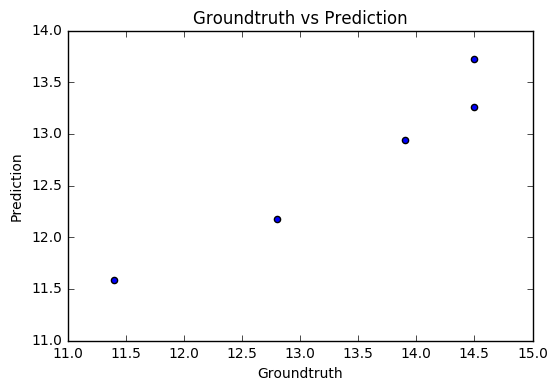

In [80]:
plt.scatter(y_gt_vec,y_pred_vec)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [77]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [78]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [79]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

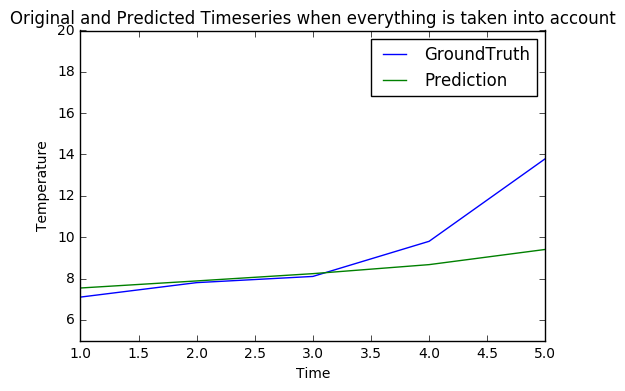

In [70]:
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(1,6,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.ylim(ymin=5)
plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [29]:
# df_test
# print(time_index)
# print(y_gt_vec)
# print(y_pred_vec)

In [82]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [83]:
# df.as_matrix(columns=['Temperature'])